In [5]:
#coding:utf-8

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas import Series,DataFrame 

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#有中文出现的情况，需要u'内容'


In [6]:
# 读取数据 ，展示数据表

df = pd.read_excel("D:\\a_code_place\\theSpider\\06_AnJuKeHouseSpider\\AnJuKeInfo.xls")
df.head()


,Title,Village,Position,Floor,ConstructionAge,Area,Direction,Layout,TotalPrice,UnitPrice
0,阳光城蓝光文澜府！精装洋房！南北通透！门口即学校！,阳光城蓝光文澜府,青山湖解放东路东升大道,中层(共11层),2017年,89平方米,南,3室2厅,100.0,11236元/m²
1,只要112万！112万！精装修卖毛呸价，房东这个价只卖年前,南昌万达文化旅游城N区,红谷滩九龙湖璜北支线,高层(共33层),2016年,98.1平方米,南北,3室2厅,112.0,11412元/m²
2,近地铁可读南师附小精装一房一厅售84万,商城世纪村,红谷滩怡园路红谷中大道728号,中层(共11层),2010年,49.9平方米,南北,1室1厅,84.0,16827元/m²
3,红谷滩近铜锣湾广场庐山南大道万科玖里房源精装三房,万科玖里,红谷滩丰和北大道庐山南大道1888号,中层(共26层),2017年,100.5平方米,南北,3室2厅,120.0,11945元/m²
4,单价八千枫华天城地铁口精装房现在购买返十万家电礼包,城泰枫华天成,昌北昌北经济开发区经开大道2888号,中层(共31层),2018年,107平方米,南,3室2厅,90.0,8411元/m²


In [7]:
# 字段类型

df.dtypes

Title               object
Village             object
Position            object
Floor               object
ConstructionAge     object
Area                object
Direction           object
Layout              object
TotalPrice         float64
UnitPrice           object
dtype: object

In [8]:
# 数据预处理

# 1. 楼层提取数字  floor字段
df['Floor']=df['Floor'].str.extract('(\d+)')
df.head()



,Title,Village,Position,Floor,ConstructionAge,Area,Direction,Layout,TotalPrice,UnitPrice
0,阳光城蓝光文澜府！精装洋房！南北通透！门口即学校！,阳光城蓝光文澜府,青山湖解放东路东升大道,11,2017年,89平方米,南,3室2厅,100.0,11236元/m²
1,只要112万！112万！精装修卖毛呸价，房东这个价只卖年前,南昌万达文化旅游城N区,红谷滩九龙湖璜北支线,33,2016年,98.1平方米,南北,3室2厅,112.0,11412元/m²
2,近地铁可读南师附小精装一房一厅售84万,商城世纪村,红谷滩怡园路红谷中大道728号,11,2010年,49.9平方米,南北,1室1厅,84.0,16827元/m²
3,红谷滩近铜锣湾广场庐山南大道万科玖里房源精装三房,万科玖里,红谷滩丰和北大道庐山南大道1888号,26,2017年,100.5平方米,南北,3室2厅,120.0,11945元/m²
4,单价八千枫华天城地铁口精装房现在购买返十万家电礼包,城泰枫华天成,昌北昌北经济开发区经开大道2888号,31,2018年,107平方米,南,3室2厅,90.0,8411元/m²


In [9]:
# 数据预处理

# 2. 面积提取数字  Area字段
df['Area']=df['Area'].str.replace("平方米", "")

df.head()

,Title,Village,Position,Floor,ConstructionAge,Area,Direction,Layout,TotalPrice,UnitPrice
0,阳光城蓝光文澜府！精装洋房！南北通透！门口即学校！,阳光城蓝光文澜府,青山湖解放东路东升大道,11,2017年,89,南,3室2厅,100.0,11236元/m²
1,只要112万！112万！精装修卖毛呸价，房东这个价只卖年前,南昌万达文化旅游城N区,红谷滩九龙湖璜北支线,33,2016年,98.1,南北,3室2厅,112.0,11412元/m²
2,近地铁可读南师附小精装一房一厅售84万,商城世纪村,红谷滩怡园路红谷中大道728号,11,2010年,49.9,南北,1室1厅,84.0,16827元/m²
3,红谷滩近铜锣湾广场庐山南大道万科玖里房源精装三房,万科玖里,红谷滩丰和北大道庐山南大道1888号,26,2017年,100.5,南北,3室2厅,120.0,11945元/m²
4,单价八千枫华天城地铁口精装房现在购买返十万家电礼包,城泰枫华天成,昌北昌北经济开发区经开大道2888号,31,2018年,107,南,3室2厅,90.0,8411元/m²


In [10]:
# 数据预处理

# 3. 布局去除 *卫  Layout字段
df['Layout'] = df['Layout'].apply(lambda x:x[:4])

df.head()

,Title,Village,Position,Floor,ConstructionAge,Area,Direction,Layout,TotalPrice,UnitPrice
0,阳光城蓝光文澜府！精装洋房！南北通透！门口即学校！,阳光城蓝光文澜府,青山湖解放东路东升大道,11,2017年,89,南,3室2厅,100.0,11236元/m²
1,只要112万！112万！精装修卖毛呸价，房东这个价只卖年前,南昌万达文化旅游城N区,红谷滩九龙湖璜北支线,33,2016年,98.1,南北,3室2厅,112.0,11412元/m²
2,近地铁可读南师附小精装一房一厅售84万,商城世纪村,红谷滩怡园路红谷中大道728号,11,2010年,49.9,南北,1室1厅,84.0,16827元/m²
3,红谷滩近铜锣湾广场庐山南大道万科玖里房源精装三房,万科玖里,红谷滩丰和北大道庐山南大道1888号,26,2017年,100.5,南北,3室2厅,120.0,11945元/m²
4,单价八千枫华天城地铁口精装房现在购买返十万家电礼包,城泰枫华天成,昌北昌北经济开发区经开大道2888号,31,2018年,107,南,3室2厅,90.0,8411元/m²


In [11]:
# 数据预处理

# 4. 单价去除 元/m²  UnitPrice字段
df['UnitPrice'] = df['UnitPrice'].str.replace("元/m²", "")

df.head()

,Title,Village,Position,Floor,ConstructionAge,Area,Direction,Layout,TotalPrice,UnitPrice
0,阳光城蓝光文澜府！精装洋房！南北通透！门口即学校！,阳光城蓝光文澜府,青山湖解放东路东升大道,11,2017年,89,南,3室2厅,100.0,11236
1,只要112万！112万！精装修卖毛呸价，房东这个价只卖年前,南昌万达文化旅游城N区,红谷滩九龙湖璜北支线,33,2016年,98.1,南北,3室2厅,112.0,11412
2,近地铁可读南师附小精装一房一厅售84万,商城世纪村,红谷滩怡园路红谷中大道728号,11,2010年,49.9,南北,1室1厅,84.0,16827
3,红谷滩近铜锣湾广场庐山南大道万科玖里房源精装三房,万科玖里,红谷滩丰和北大道庐山南大道1888号,26,2017年,100.5,南北,3室2厅,120.0,11945
4,单价八千枫华天城地铁口精装房现在购买返十万家电礼包,城泰枫华天成,昌北昌北经济开发区经开大道2888号,31,2018年,107,南,3室2厅,90.0,8411


In [12]:
# 数据预处理
# 5.  字符转换

#将Area 字段转化为 float
df['Area'] = df['Area'].apply(pd.to_numeric, errors='ignore')
#将TotalPrice 字段转化为 float
df['TotalPrice'] = df['TotalPrice'].apply(pd.to_numeric, errors='ignore')



C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


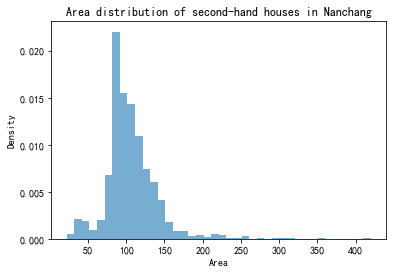

In [13]:
# 数据展示 部分
# 1. 南昌二手房的面积分布图



plt.hist(df['Area'],bins =  40,histtype="stepfilled",normed=True,alpha=0.6)  # 这个参数指定bin(箱子)的个数,也就是总共有几条条状图
                                                                              # normed=True 控制频次百分比
                                                                              # alpha参数用来设置透明度
plt.title('Area distribution of second-hand houses in Nanchang')#显示图表标题

plt.xlabel('Area')#x轴名称
plt.ylabel('Density')#y轴名称

        
plt.show()

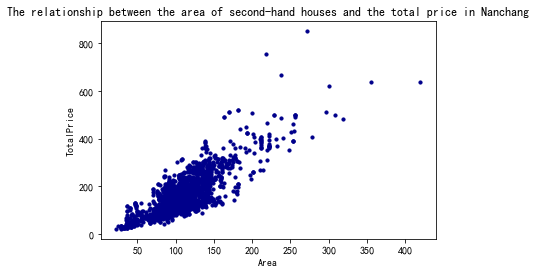

In [14]:
# 数据展示 部分
# 2. 南昌二手房面积与总价关系


plt.scatter(df['Area'], df['TotalPrice'] , s=10, c="DarkBlue") #  s越小 点越小 密度越高

plt.title('The relationship between the area of second-hand houses and the total price in Nanchang')#显示图表标题

plt.xlabel('Area')#x轴名称
plt.ylabel('TotalPrice')#y轴名称

plt.show()






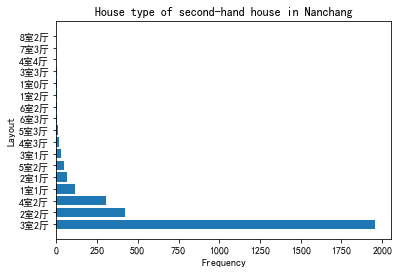

In [15]:
# 数据展示 部分
# 3. 南昌二手房的户型图


# 频次统计
df2 = DataFrame(df['Layout'].value_counts())

# 将 layout 置空
df2.rename(columns=lambda x:x.replace('Layout',''), inplace=True)

#重命名
df3 = DataFrame(df2).reset_index()
df3.columns = ["Layout", "Number"]

df3.head()


# bar 是 竖向   barh 横向
plt.barh(df3["Layout"],df3["Number"])
plt.title('House type of second-hand house in Nanchang')#显示图表标题

plt.xlabel('Frequency')#x轴名称
plt.ylabel('Layout')#y轴名称
plt.show()


In [101]:


df.head()


,Title,Village,Position,Floor,ConstructionAge,Area,Direction,Layout,TotalPrice,UnitPrice
0,阳光城蓝光文澜府！精装洋房！南北通透！门口即学校！,阳光城蓝光文澜府,青山湖解放东路东升大道,11,2017年,89.0,南,3室2厅,100.0,11236
1,只要112万！112万！精装修卖毛呸价，房东这个价只卖年前,南昌万达文化旅游城N区,红谷滩九龙湖璜北支线,33,2016年,98.1,南北,3室2厅,112.0,11412
2,近地铁可读南师附小精装一房一厅售84万,商城世纪村,红谷滩怡园路红谷中大道728号,11,2010年,49.9,南北,1室1厅,84.0,16827
3,红谷滩近铜锣湾广场庐山南大道万科玖里房源精装三房,万科玖里,红谷滩丰和北大道庐山南大道1888号,26,2017年,100.5,南北,3室2厅,120.0,11945
4,单价八千枫华天城地铁口精装房现在购买返十万家电礼包,城泰枫华天成,昌北昌北经济开发区经开大道2888号,31,2018年,107.0,南,3室2厅,90.0,8411


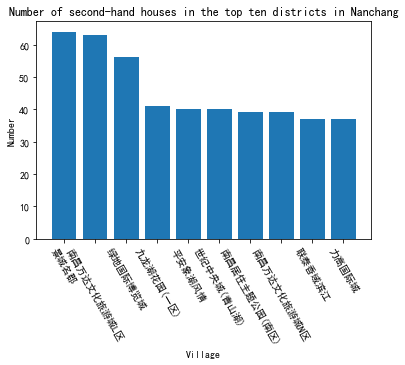

In [102]:
# 附加内容


# 1. 南昌二手房房源数量排名前十的小区的房源数量（横坐标：小区名；纵坐标：房源数量）

df4 = DataFrame(df['Village'].value_counts()[0:10])
df4.rename(columns=lambda x:x.replace('Village',''), inplace=True)

df5 = DataFrame(df4).reset_index()
df5.columns = ["Village", "Number"]

df5.head(10)

plt.bar(df5["Village"],df5["Number"])
plt.title('Number of second-hand houses in the top ten districts in Nanchang')#显示图表标题

plt.xlabel('Village')#x轴名称
plt.ylabel('Number')#y轴名称
plt.xticks(rotation=-60)# 倾斜角
plt.show()

['景城名郡', '南昌万达文化旅游城L区', '绿地国际博览城', '九龙湖花园(一区)', '平安象湖风情', '世纪中央城(青山湖)', '南昌居住主题公园(南区)', '南昌万达文化旅游城N区', '联泰香域滨江', '力高国际城']
[10964, 11473, 15514, 15869, 10246, 23912, 10387, 11119, 18938, 10249]


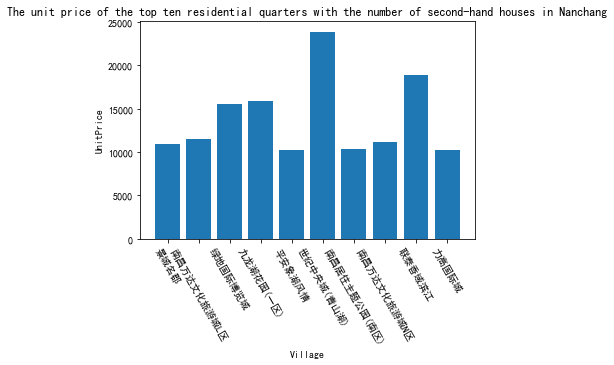

In [103]:
#  2. 南昌二手房房源数量排名前十的小区的单价（横坐标：小区名（与图九一致）；纵坐标：单价）


# 获取房源数量前十的小区信息
df4 = DataFrame(df['Village'].value_counts()[0:10])
df4.rename(columns=lambda x:x.replace('Village',''), inplace=True)

df5 = DataFrame(df4).reset_index()
df5.columns = ["Village", "Number"]

houselist = []

for i in range(0,10):

    houselist.append(df5["Village"][i])
    
print(houselist)

pricelist = []


df['UnitPrice'] = df['UnitPrice'].apply(pd.to_numeric, errors='ignore')  # 转类型 UnitPrice:int


# 选取df 中Village列包含******的行
df_2_0 = df[df['Village'].isin(["景城名郡"])]
pricelist.append(int(df_2_0["UnitPrice"].mean()))

df_2_1 = df[df['Village'].isin(["南昌万达文化旅游城L区"])]
pricelist.append(int(df_2_1["UnitPrice"].mean()))

df_2_2 = df[df['Village'].isin(["绿地国际博览城"])]
pricelist.append(int(df_2_2["UnitPrice"].mean()))

df_2_3 = df[df['Village'].isin(["九龙湖花园(一区)"])]
pricelist.append(int(df_2_3["UnitPrice"].mean()))

df_2_4 = df[df['Village'].isin(["平安象湖风情"])]
pricelist.append(int(df_2_4["UnitPrice"].mean()))

df_2_5 = df[df['Village'].isin(["世纪中央城(青山湖)"])]
pricelist.append(int(df_2_5["UnitPrice"].mean()))

df_2_6 = df[df['Village'].isin(["南昌居住主题公园(南区)"])]
pricelist.append(int(df_2_6["UnitPrice"].mean()))

df_2_7 = df[df['Village'].isin(["南昌万达文化旅游城N区"])]
pricelist.append(int(df_2_7["UnitPrice"].mean()))

df_2_8 = df[df['Village'].isin(["联泰香域滨江"])]
pricelist.append(int(df_2_8["UnitPrice"].mean()))

df_2_9= df[df['Village'].isin(["力高国际城"])]
pricelist.append(int(df_2_9["UnitPrice"].mean()))


print(pricelist)



#  建立 小区 与 小区单价平均数的df

villageAndUnitprice = {'Village':houselist,                       
                       'UnitPrice':pricelist  }

df_2 =   pd.DataFrame(villageAndUnitprice)

df_2.head()


plt.bar(df_2["Village"],df_2["UnitPrice"])
plt.title('The unit price of the top ten residential quarters with the number of second-hand houses in Nanchang')#显示图表标题

plt.xlabel('Village')#x轴名称
plt.ylabel('UnitPrice')#y轴名称
plt.xticks(rotation=-60)# 倾斜角
plt.show()





['南北', '南', '东', '北', '西', '东西', '东南', '东北', '西南', '西北']
[13954, 13345, 14539, 18679, 15008, 16018, 14706, 17391, 18189, 16616]


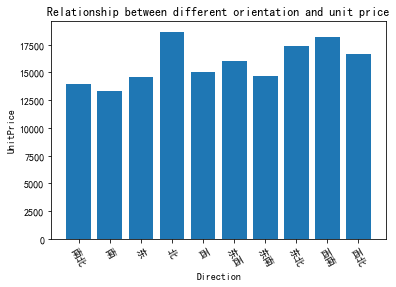

In [105]:
# 3. 分析不同的朝向与单价的关系（横坐标：方向；纵坐标：单价）


df.head()
  
# 选取df Direction列包含******的行  南  南北
df6 = DataFrame(df['Direction'].value_counts()[0:10])
df6.rename(columns=lambda x:x.replace('Direction',''), inplace=True)

df7 = DataFrame(df6).reset_index()
df7.columns = ["Direction", "Number"]

Directionlist = []

for i in range(0,10):

    Directionlist.append(df7["Direction"][i])
    
print(Directionlist)

pricelist = []


# 选取df Direction******的行
df_3_0 = df[df['Direction'].isin(["南北"])]
pricelist.append(int(df_3_0["UnitPrice"].mean()))
df_3_1 = df[df['Direction'].isin(["南"])]
pricelist.append(int(df_3_1["UnitPrice"].mean()))
df_3_2 = df[df['Direction'].isin(["东"])]
pricelist.append(int(df_3_2["UnitPrice"].mean()))
df_3_3 = df[df['Direction'].isin(["北"])]
pricelist.append(int(df_3_3["UnitPrice"].mean()))
df_3_4 = df[df['Direction'].isin(["西"])]
pricelist.append(int(df_3_4["UnitPrice"].mean()))
df_3_5 = df[df['Direction'].isin(["东西"])]
pricelist.append(int(df_3_5["UnitPrice"].mean()))
df_3_6 = df[df['Direction'].isin(["东南"])]
pricelist.append(int(df_3_6["UnitPrice"].mean()))
df_3_7 = df[df['Direction'].isin(["东北"])]
pricelist.append(int(df_3_7["UnitPrice"].mean()))
df_3_8 = df[df['Direction'].isin(["西南"])]
pricelist.append(int(df_3_8["UnitPrice"].mean()))
df_3_9 = df[df['Direction'].isin(["西北"])]
pricelist.append(int(df_3_9["UnitPrice"].mean()))
print(pricelist)

#  建立 Direction 与 小区单价平均数的df

villageAndUnitprice = {'Direction':Directionlist,                       
                       'UnitPrice':pricelist  }

df_3 =   pd.DataFrame(villageAndUnitprice)

df_3.head()


plt.bar(df_3["Direction"],df_3["UnitPrice"])
plt.title('Relationship between different orientation and unit price')#显示图表标题

plt.xlabel('Direction')#x轴名称
plt.ylabel('UnitPrice')#y轴名称
plt.xticks(rotation=-60)# 倾斜角
plt.show()

